In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Data Extraction

## Introduction

The American Ultimate Disc League, or AUDL, is a professional ultimate disc league with teams across the country, and over 600 registered players. We have collected publicly available data with statistics on the performance of individual players and teams throughout the 2019 season and are analyzing it to identify patterns in how players impact their teams and different styles of play that those players might adopt.

## Importing data

Our data is parsed from three sources. We collected player stats, team stats, and team rosters, all for the 2019 AUDL season.

### Player Stats

These are parsed from <https://theaudl.com/stats/player-season>, they consist of players' full-season stats.

In [2]:
player_stats = pd.read_csv("../data/player_stats.csv", index_col=0)
player_stats.head()

,PLAYER,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Quentin Bonnaud,12,83,6.92,15,1.25,14,1.17,101,8.42,208,17.33,96.3,284,23.67
1,Rowan McDonnell,13,67,5.15,51,3.92,5,0.38,92,7.08,408,31.38,93.8,359,27.62
2,Ben Jagt,15,67,4.47,64,4.27,14,0.93,111,7.40,287,19.13,91.4,379,25.27
3,Max Sheppard,14,61,4.36,68,4.86,9,0.64,103,7.36,295,21.07,91.0,337,24.07
4,Eli Jaime,10,52,5.20,12,1.20,4,0.40,61,6.10,101,10.10,95.3,211,21.10


### Team Stats

These are each team's stats for the full season, parsed from <https://theaudl.com/stats/team>.

In [3]:
team_stats = pd.read_csv("../data/team_stats.csv", index_col=0)
team_stats.head()

,Team,G,W,L,T,PTS,PPG,PA,PAPG,OEFF,DEFF,+ / -,+/- PG,BLK,BPG,CMP,CPG,CMP %,TO,TPG
0,New York Empire,15,15,0,0,334,22.27,282,18.80,0.48,-0.42,588,39.20,150,10.00,"3,547",236.47,94.7,230,15.33
1,San Diego Growlers,14,11,3,0,328,23.43,292,20.86,0.46,-0.42,581,41.50,157,11.21,"3,404",243.14,94.8,228,16.29
2,Raleigh Flyers,13,10,3,0,293,22.54,255,19.62,0.39,-0.36,514,39.54,124,9.54,"3,197",245.92,95.0,192,14.77
3,Dallas Roughnecks,15,10,5,0,320,21.33,300,20.00,0.32,-0.41,550,36.67,202,13.47,"3,640",242.67,93.7,290,19.33
4,Pittsburgh Thunderbirds,14,9,5,0,298,21.29,270,19.29,0.33,-0.41,487,34.79,141,10.07,"3,551",253.64,94.5,249,17.79


### Team Rosters

These associate players with teams, and are parsed from individual team pages at <https://theaudl.com/league/teams>.

In [4]:
rosters = pd.read_csv("../data/rosters.csv", index_col=0)
rosters.head()

,Team,Player
0,hustle,Sam Batson
1,hustle,Sun Choi
2,hustle,Karl Ekwurtzel
3,hustle,Brett Hulsmeyer
4,hustle,Elijah Jaime


## Data Processing

We want to combine this data to make it easier to analyze. The first thing we can do is to combine the player statistics and the rosters, so that teams are associated with players. We perform an inner merge, so that players who are not associated with a roster are dropped from the table.

## Data description

*What are the observations (rows) and the attributes (columns)?*

Each observation represents data collected about a given player in the 2019 AUDL season. The following features are recorded for each player.

Object fields:
- Player: The name of the player as registered with AUDL (string)
- Team: The roster a player is on (string)

Numeric fields:
- G: Games played
- GLS: Goals scored
- GPG: Goals per game
- AST: Assists
- APG: Assists per game
- BLK: Blocks
- BPG: Blocks per game
- +/-: Plus/minus, the player's points won - points lost
- +/- PG: Plus/minus per game
- CMP: Completions (thrown passes that were caught)
- CPG: Completions per game
- CMP %: Completion percentage
- PP: Points played
- PPG: Points played per game

*Why was this dataset created?*

This dataset was created to document the performance of teams and players in the AUDL. The data could be used by players and teams, to evaluate their opponents' and their own strengths and weaknesses, as well as by spectators, to keep track of how their teams were performing throughout the season.

*Who funded the creation of the dataset?*

The collection and creation of this data was funded by the American Ultimate Disc League.

*What processes might have influenced what data was observed and recorded and what was not?*

To the best of our knowledge, all data was recorded for all games played in the 2019 season. However, it's possible that data may not have been collected in full for some poorly attended games, but this is not documented.

*What preprocessing was done, and how did the data come to be in the form that you are using?*

This data required minimal preprocessing, because the AUDL presented it in a well-processed and documented format. They have calculated per-game evaluations of some of the statistics. Our preprocessing mostly consists of joining the different datasets together.

*If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?*

The subjects of this data collection are AUDL players, who were aware of this data collection because it was made publicly available and collected with their consent. They likely expected the data to be used for the purposes described above.

*Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).*



In [5]:
data = rosters.merge(player_stats, left_on='Player', right_on='PLAYER')
data.drop("PLAYER", inplace=True, axis=1)
print(data.shape)
data.head()

(569, 16)


,Team,Player,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,hustle,Sam Batson,8,0,0.00,4,0.50,3,0.38,4,0.50,24,3.00,88.9,67,8.38
1,hustle,Sun Choi,10,2,0.20,10,1.00,3,0.30,6,0.60,90,9.00,90.9,132,13.20
2,hustle,Karl Ekwurtzel,9,4,0.44,1,0.11,4,0.44,2,0.22,44,4.89,86.3,121,13.44
3,hustle,Brett Hulsmeyer,10,8,0.80,1,0.10,12,1.20,18,1.80,38,3.80,92.7,179,17.90
4,hustle,Matthew Knowles,7,0,0.00,13,1.86,0,0.00,7,1.00,117,16.71,95.1,108,15.43


## Exploratory Data Analysis

Here we'll examine some of the features of the dataset, to better understand how they relate

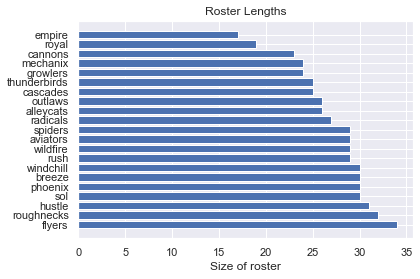

In [6]:
# Roster counts
count = data.Team.value_counts()
plt.barh(count.index, count)
plt.xlabel("Size of roster")
plt.title("Roster Lengths")
plt.show()

We should note that not all teams have the same number of players rostered--it's not even close! The flyers have almost twice as many players on their roster as empire does. There's a good explanation for this.

In [7]:
per_game_features = ["GPG", "APG", "BPG", "+/- PG", "CPG", "PPG"]
pg_data = data[per_game_features]
pg_data.head()

,GPG,APG,BPG,+/- PG,CPG,PPG
0,0.00,0.50,0.38,0.50,3.00,8.38
1,0.20,1.00,0.30,0.60,9.00,13.20
2,0.44,0.11,0.44,0.22,4.89,13.44
3,0.80,0.10,1.20,1.80,3.80,17.90
4,0.00,1.86,0.00,1.00,16.71,15.43


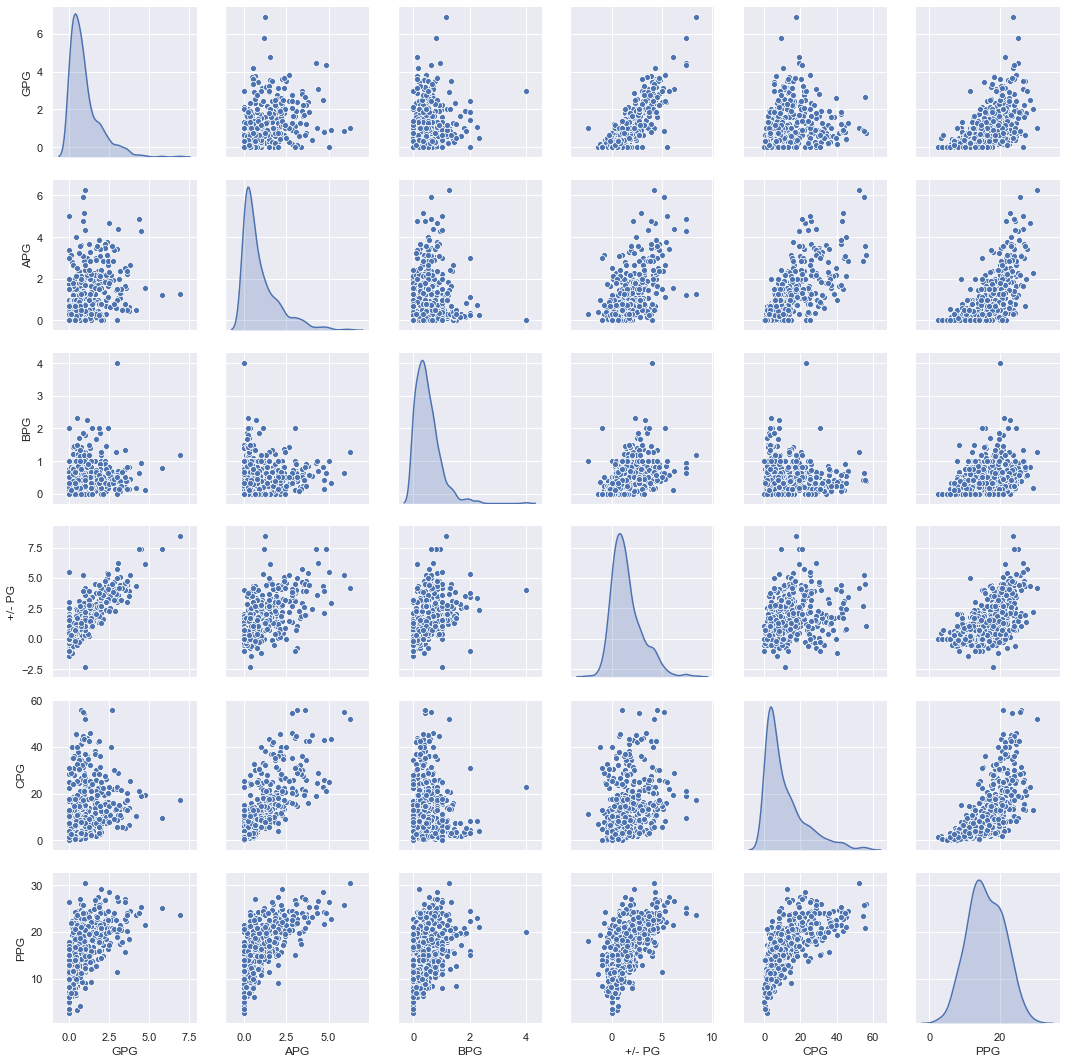

In [8]:
sns.pairplot(pg_data, diag_kind='kde')
plt.show()

It's also important to note that not every player plays the same number of games in the AUDL. Some miss part of the season due to injury, and some are brought in as ringers for only a few games. Let's see how the number of games played is distributed.

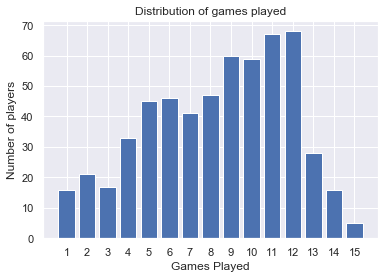

In [9]:
labels, counts = np.unique(data.G, return_counts=True)
plt.bar(labels, counts)
plt.xticks(labels)
plt.xlabel("Games Played")
plt.ylabel("Number of players")
plt.title("Distribution of games played")
plt.show()

We see the largest number of players playing between 9 and 12 games, with very few playing more than 12 (probably because those players have to reach the postseason) and a strong tail less than 9, which probably represents players who were injured or only played a few games for a team.

## Clustering

KMeans is an algorithm that attempts to find clusters of similar data points in unlabeled data. This way, although we don't already know which players are cutters or handlers, we can build an algorithm that may be able to identify them anyways.

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

cluster_features = ["BPG", "APG", "CPG", "GPG", "+/- PG"]

## Principle Component Analysis

PCA is a technique that identifies isometric axes along which the data varies the most. It's useful for seeing which features are the best for differentiating the data, but its best application is in visualizing multi-dimensional data by projecting it onto a 2-D plane.

In order to perform PCA, we first have to normalize the data. For our clustering, we want to try to eliminate the effect of games played--we don't want to cluster along that axis if possible, so we use only per-game statistics in order to eliminate that effect.

In [11]:
#pg_data = data[per_game_features]
pg_data = data.loc[data.G > 8, cluster_features]
pg_norm_data = (pg_data - pg_data.mean()) / pg_data.std()

print(pg_norm_data.shape)
pg_norm_data.head()

(303, 5)


,BPG,APG,CPG,GPG,+/- PG
1,-0.661649,-0.136556,-0.385900,-0.954457,-0.826105
2,-0.305467,-0.913458,-0.737291,-0.714986,-1.076930
3,1.628093,-0.922188,-0.830483,-0.355781,-0.034027
8,-0.585324,-0.040535,0.240790,-0.714986,-0.707293
11,-0.509000,1.452165,1.867791,-0.974412,-0.324456


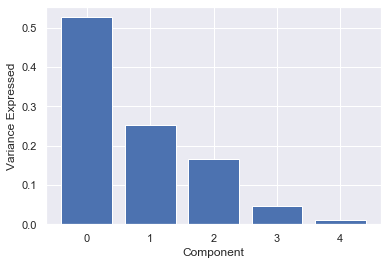

In [12]:
pca = PCA()
pca.fit(pg_norm_data.values)

evr = pca.explained_variance_ratio_
plt.bar(*zip(*enumerate(evr)))
plt.xticks(np.arange(len(evr)))
plt.xlabel("Component")
plt.ylabel("Variance Expressed")
plt.show()

In [13]:
components = pd.DataFrame(pca.components_, columns=pg_norm_data.columns)
components.head(2)

,BPG,APG,CPG,GPG,+/- PG
0,0.066452,0.529779,0.417118,0.481052,0.556345
1,0.698977,-0.258312,-0.519776,0.266929,0.321384


We can use the two highest ranked components of the PCA, which capture 75% of the variance in our data, to visualize our players. While this 2-D projection of the 5-D data necessarily excludes some of the variance, the PCA algorithm selects optimal axes so that the projection displays the maximum possible amount of the variance.

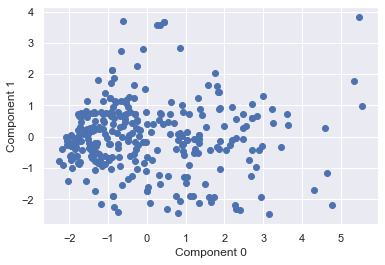

In [14]:
comp = pca.components_[:2]
pg_transform = np.dot(pg_norm_data.values, comp.T)
plt.scatter(*pg_transform.T)
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.show()

PCA plots are always hard to interpret, because their axes don't capture any intuitive meaning. Looking at the components above, it seems like the 0 axis (the x axis of the plot) captures mostly positive contributions to goals, assists, completions and overall plus/minus, while the 1 axis (the y axis of the plot) captures blocks and negative contributions to assists and completions. We know that offensive players will get most assists, goals and completions, while defensive players are more likely to collect blocks and tend to have a negative plus/minus (because they play mostly defensive points). Therefore, we can describe the 0 component as the "offensive component" and the 1 component as the "defensive component". We can use a KMeans clustering analysis to better quantify this intuition.

## KMeans

KMeans is a clustering algorithm that identifies patterns, or clusters, in unlabeled data. In essence it begins with $K$ centers (selected randomly) and in each iteration over the data, adjusts those centers to optimize a loss function. First we need to choose how many clusters to model. We do this by constructing an "elbow plot," which plots the score of the objective function of the algorithm (the sum of the euclidean distances of each point from its respective cluster center) for a model fit on each number of clusters $K$. We can see how increasing the number of clusters improves the model's score (but makes it less interpretable) and choose a number of clusters on the "elbow" that maximizes the score while remaining interpretable.

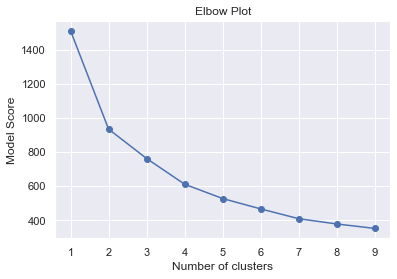

In [15]:
ks = np.arange(1,10)
scores = []
for k in ks:
    model = KMeans(k)
    model.fit(pg_norm_data)
    scores.append(- model.score(pg_norm_data))

plt.plot(ks, scores, 'o-')
plt.xlabel("Number of clusters")
plt.ylabel("Model Score")
plt.title("Elbow Plot")
plt.show()

This elbow plot suggests that we should fit a model with 2-4 clusters

In [16]:
K = 2

model = KMeans(K)
model.fit(pg_norm_data)
labels = model.predict(pg_norm_data)

A good first way to check the results of our model is to see how many players were placed under each label. We can use the model to predict labels for all the players and then build a bar chart to see how many players were placed into each category. We would like to see relatively balanced clusters, although an even 50/50 split is not necessary and could actually indicate that the data is being split randomly.

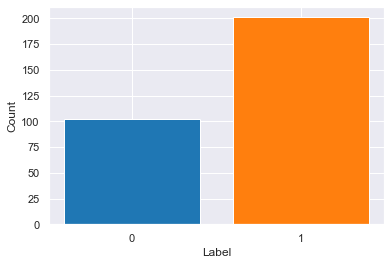

In [17]:
label_names, counts = np.unique(labels,return_counts=True)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
plt.bar(label_names, counts, color=colors)
plt.xticks(label_names)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

These look like reasonable results--we can visualize them in our pca plot as well to try to understand what the labels are expressing

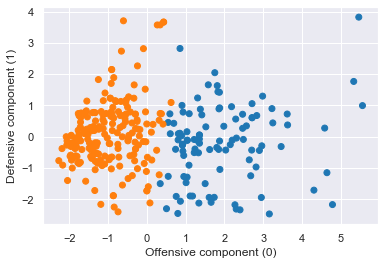

In [18]:
labels_c = [colors[l] for l in labels]
plt.scatter(*pg_transform.T, c=labels_c)
plt.xlabel('Offensive component (0)')
plt.ylabel('Defensive component (1)')
plt.show()

This is a valuable visualization! It looks like our clusters are separated mostly along the offensive axis--so they probably indicate a split between offensive and defensive players. While we can't plot all of our features at the same time, we can look at the distributions of each feature within the clusters to get a better idea of how they are being separated.

C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


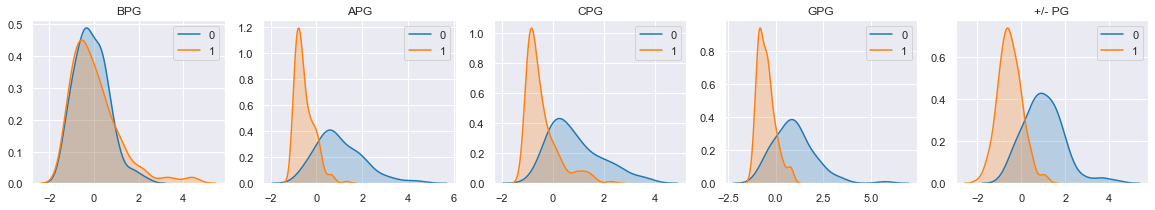

In [19]:
fig, axes = plt.subplots(1,5, figsize=(20,3))

for ax, col in zip(axes.ravel(), pg_norm_data):
    for label in range(4):
        sns.kdeplot(pg_norm_data.loc[labels==label, col], ax=ax, color=colors[label], shade=True, label=label)
    
    ax.set_title(col)

fig.show()

These plots show pretty clearly how the data is really being clustered. The 0 cluster contains mostly defensive players, while the 1 cluster contains offensive players. While it's subtle, it's clear that the 0 cluster has a much longer positive tail in the blocks category, and is generally positively skewed, suggesting that those players get more blocks. For the offensive stats (assists, completions, goals), the 0 cluster players score almost none, while the 1 cluster tends to have a more even distribution. Finally, the 0 cluster players have a significantly lower plus/minus than the 1 cluster players, which makes sense because defensive players tend to play defensive points (they don't receive the disc at the beginning of the point) so they win their points much less often.

In [20]:
filter_data = data.loc[data.G > 8]

sns.kdeplot(filter_data.loc[~indexer,"PPG"], shade=True, color=colors[0], label=0)
sns.kdeplot(filter_data.loc[indexer, "PPG"], shade=True, color=colors[1], label=1)
plt.title("Games Played")
plt.show()

NameError: name 'indexer' is not defined

While there's a fair amount of overlap in these distributions, it's far from perfect. There's clearly more of the 10-13 games players in group 1 rather than group 0. That said, we also saw above that group 1 seems to contain many of the higher-skilled players, so it may just be that those players tend to play more games than others. This is a more plausible theory, because the model was not able to cluster on games played at all--it's unlikely that games played was inferred from the data it was provided.